<a href="https://colab.research.google.com/github/seojeong-oh/mom-dad-lab/blob/main/fashion_MNIST_tensorflow_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **필요한 모듈 불러오기**

In [25]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Fashion MNIST 데이터셋 불러오기

In [26]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

fashion_mnist 모듈은 데이터셋을 반환하는 load_data() 함수를 포함하는데, load_data() 함수를 호출하면 NumPy 어레이의 튜플을 반환함

train_images와 train_labels는 Neural Network 모델의 훈련 (training)에 사용되고,

test_images와 test_labels는 테스트 (test)에 사용

In [27]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)
print(train_labels[:8])

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
[9 0 0 3 0 2 7 2]


**images**

*   train_images와 test_images는 각각 (28x28)의 형태를 갖는 60000개, 10000개 이미지의 어레이


**labels**


*   0에서 9까지의 정수 값은 이미지(옷)의 클래스를 나타내는 레이블

각각의 레이블과 클래스는 아래와 같다.

0 : T-shirt/top

1 : Trouser

2 : Pullover

3 : Dress

4 : Coat

5 : Sandal

6 : Shirt

7 : Sneaker

8 : Bag

9 : Ankel boot


# **데이터 전처리**

In [28]:
#0에서 255 사이의 값을 갖는 훈련/테스트 데이터들을 0.0~1.0 사이의 값을 갖도록 변환
train_images, test_images = train_images / 255.0, test_images / 255.0

# **모델 구성(layer 3개)**

In [42]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                50240     
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


relu함수를 은닉층(hidden layer)에서 많이 사용하는 이유 
1. 기울기 소실 문제가 발생하지 않음
2. 기존 활성화 함수에 비해 속도가 매우 빠름

## **모델 컴파일하기**

**loss function**

Binary Crossentropy : 실제 레이블과 예측 레이블 간의 교차 엔트로피 손실을 계산한다. 레이블 클래스(0, 1로 가정)가 2개만 존재할 때 사용

Categorical Crossentropy : 다중 분류 손실함수로 출력값이 one-hot encoding 된 결과로 나오고 실측 결과와의 비교시에도 실측 결과는 one-hot encoding 형태로 구성

Sparse_Categorical_Crossentropy : 'categorical_entropy'처럼 다중 분류 손실함수이지만, 샘플 값은 정수형 자료
샘플 값을 입력하는 부분에서 별도 원핫 인코딩을 하지 않고 정수값 그대로 줄 수 있다. 이런 자료를 사용할 때, 컴파일 단계에서 손실 함수만  'sparse_categorical_crossentropy'로 바꿔주면 된다.

In [43]:
model.compile(optimizer='adam', # 훈련 과정에서 모델의 오차를 측정하는데 사용
              loss='sparse_categorical_crossentropy', # 데이터와 손실함수를 바탕으로 모델을 업데이트하는 방식
              metrics=['accuracy']) #훈련과 테스트 단계를 평가하기 위해 사용

## **모델 훈련하기**

In [45]:
history = model.fit(train_images, train_labels, epochs=30, validation_split=0.25)
                    #callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss')],) # batch_sizes default값 32

Epoch 1/30
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2087 - accuracy: 0.9234 - val_loss: 0.3555 - val_accuracy: 0.8819
Epoch 2/30
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2045 - accuracy: 0.9248 - val_loss: 0.3587 - val_accuracy: 0.8821
Epoch 3/30
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2020 - accuracy: 0.9246 - val_loss: 0.3462 - val_accuracy: 0.8861
Epoch 4/30
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1963 - accuracy: 0.9273 - val_loss: 0.3724 - val_accuracy: 0.8816
Epoch 5/30
1407/1407 [==============================] - 7s 5ms/step - loss: 0.1916 - accuracy: 0.9278 - val_loss: 0.3749 - val_accuracy: 0.8806
Epoch 6/30
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1883 - accuracy: 0.9298 - val_loss: 0.3602 - val_accuracy: 0.8880
Epoch 7/30
1407/1407 [==============================] - 5s 4ms/step - loss: 0.1861 - accuracy: 0.9312 - val_loss: 0.3528 - val_accuracy:

epochs : 60000개의 전체 이미지를 몇 번 학습할지 정하기

**시각화**

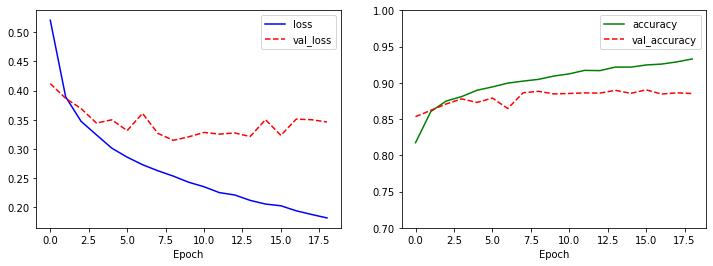

In [32]:
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

## **모델의 정확도 평가하기**

In [33]:
loss, accuracy = model.evaluate(test_images, test_labels)
print('loss : ', loss)
print('accuracy : ', accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.3834 - accuracy: 0.8771
loss :  0.3834213316440582
accuracy :  0.8770999908447266


## **학습결과 확인**

In [34]:
predictions = model.predict(test_images) # predictions : test_images에 대한 출력값
print(predictions.shape)
print(np.argmax(predictions[0]))

(10000, 10)
9


# **모델 구성(Dense -> conv2d)**

In [35]:
#기존 model을 유지하나 처음에 convolution layer가 추가되어있음 -> 시간은 더 오래걸리지만, 정확도는 더 높아짐
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.3),
  #Pooling 목적 : 과대적합을 피하기위해서
  #maxpooling : 해당 부분의 최대값만 뽑아냄
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'), #64->128로 늘리니 정확도 증가함
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.3),#과적합 방지
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 13, 13, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 5, 5, 128)        

## 모델 컴파일하기

In [36]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

## 모델 훈련하기

In [37]:
history = model.fit(train_images, train_labels, epochs=30, validation_split=0.25,
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=15, monitor='val_loss')]) 
#batch_sizes default : 32

Epoch 1/30
1407/1407 [==============================] - 14s 9ms/step - loss: 0.6246 - accuracy: 0.7726 - val_loss: 0.3842 - val_accuracy: 0.8572
Epoch 2/30
1407/1407 [==============================] - 14s 10ms/step - loss: 0.4297 - accuracy: 0.8462 - val_loss: 0.3486 - val_accuracy: 0.8727
Epoch 3/30
1407/1407 [==============================] - 13s 9ms/step - loss: 0.3733 - accuracy: 0.8632 - val_loss: 0.3052 - val_accuracy: 0.8850
Epoch 4/30
1407/1407 [==============================] - 14s 10ms/step - loss: 0.3436 - accuracy: 0.8746 - val_loss: 0.2852 - val_accuracy: 0.8926
Epoch 5/30
1407/1407 [==============================] - 14s 10ms/step - loss: 0.3236 - accuracy: 0.8818 - val_loss: 0.2811 - val_accuracy: 0.8934
Epoch 6/30
1407/1407 [==============================] - 13s 9ms/step - loss: 0.3106 - accuracy: 0.8859 - val_loss: 0.2636 - val_accuracy: 0.9009
Epoch 7/30
1407/1407 [==============================] - 14s 10ms/step - loss: 0.2932 - accuracy: 0.8926 - val_loss: 0.2608 - va

## 모델 정확도 평가

In [38]:
loss, accuracy = model.evaluate(test_images, test_labels)
print('loss : ', loss)
print('accuracy : ', accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.2628 - accuracy: 0.9132
loss :  0.26284271478652954
accuracy :  0.9132000207901001


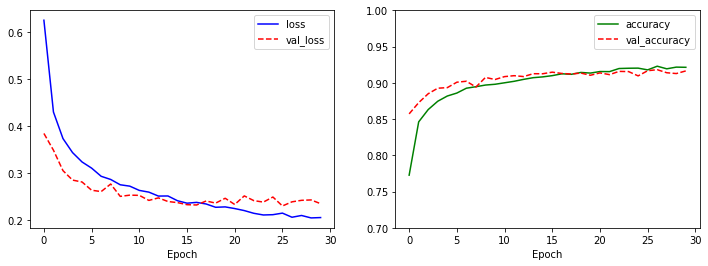

In [39]:
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

***dense->conv2d***

정확도가 향상 및 과적합도 줄어듦



pytorch 실습에서 정확도보다 높은 결과임



image.png

**시각화**

**예측하기(시각화)**

In [40]:
predictions = model.predict(test_images) # predictions : test_images에 대한 출력값
print(predictions.shape)
print(np.argmax(predictions[0]))

(10000, 10)
9


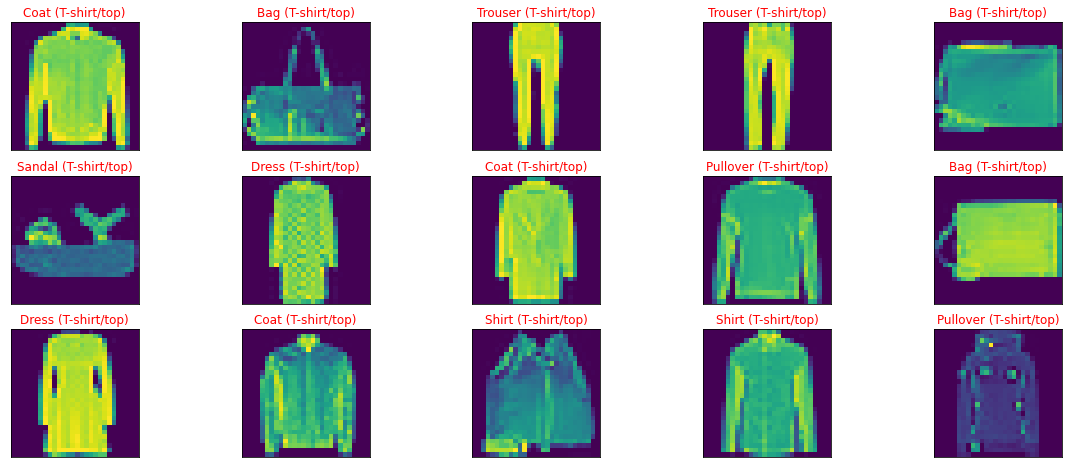

In [41]:
fashion_mnist_labels = ["T-shirt/top",  # 인덱스 0
                        "Trouser",      # 인덱스 1
                        "Pullover",     # 인덱스 2
                        "Dress",        # 인덱스 3
                        "Coat",         # 인덱스 4
                        "Sandal",       # 인덱스 5
                        "Shirt",        # 인덱스 6
                        "Sneaker",      # 인덱스 7
                        "Bag",          # 인덱스 8
                        "Ankle boot"]   # 인덱스 9

# y_hat은 test 데이터셋 예측
predictions = model.predict(test_images)
# y_hat -> predictions
#x_test -> test_images
#y_test -> test_labels
# 무작위 샘플로 10 개의 테스트 이미지와 예측 레이블 및 실제 레이블을 그려줍니다.
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(test_images.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(test_images[index])) # 각각의 이미지를 보여줌
    predict_index = np.argmax(predictions[index])
    true_index = np.argmax(test_labels[index]) # 각각의 이미지에 예측레이블 (실제레이블) 표시
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index],
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

# **Reference**
1. https://codetorial.net/tensorflow/fashion_mnist_classification.html
2. https://durian9s-coding-tree.tistory.com/2
3. https://gooopy.tistory.com/55
4. https://airsbigdata.tistory.com/219
5. https://airsbigdata.tistory.com/219
6. https://github.com/KerasKorea/KEKOxTutorial/blob/master/10_Fashion-MNIST%20with%20tf.Keras/10_%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%9D%98%20Hello%20World%2C%20Fashion-MNIST.md